Thinkful Bootcamp Course

Author: Ian Heaton

Email: iheaton@gmail.com

Mentor: Nemanja Radojkovic

Date: 2017/05/26


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy

from time import time
from IPython.display import display
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

%matplotlib inline

sb.set_style('darkgrid')
my_dpi = 96

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Cluster Models Examination



### 1 - Five Clusters Farly Close to each other :


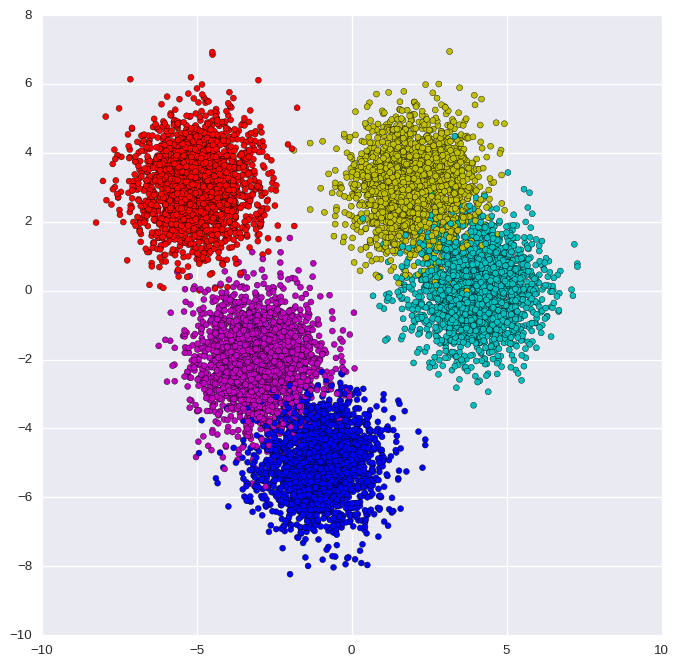

In [36]:
# The coordinates of the centers of our blobs.
centers = [[-5, 3], [-3, -2], [-1, -5], [4, 0], [2, 3]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=4,
    random_state=42)

LABEL_COLOR_MAP = {0 : 'r', 1 : 'm', 2 : 'b', 3: 'c', 4:'y'}

label_color = [LABEL_COLOR_MAP[l] for l in y]

plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
__ = plt.scatter(X[:, 0], X[:, 1], c=label_color)

In [24]:

def bench_cluster(estimator, name, data, labels=None, sample_size=300):
    results = {'time':0, 'homo':0, 'compl':0, 'v-meas':0, 'ARI':0, 'silhouette':0}
    print(79 * '_')
    t0 = time()
    estimator.fit(data)
    results['time'] = (time() - t0)
    results['silhouette'] = metrics.silhouette_score(data, estimator.labels_, metric='euclidean', sample_size=sample_size)
    if labels is not None:
        print('% 9s' % 'init''         time   homo   compl   v-meas   ARI   silhouette')
        results['homo'] = metrics.homogeneity_score(labels, estimator.labels_)
        results['compl'] = metrics.completeness_score(labels, estimator.labels_)
        results['v-meas'] = metrics.v_measure_score(labels, estimator.labels_)
        results['ARI'] = metrics.adjusted_rand_score(labels, estimator.labels_)
        print('%s % 7.2fs % 5.3f % 5.3f % 7.3f % 7.3f % 7.3f'% (name, results['time'], results['homo'],
                                                                      results['compl'], results['v-meas'],
                                                                      results['ARI'], results['silhouette']))
    else:
        print('% 13s' % 'init''         time  silhouette')
        print('%s % 7.2fs % 7.3f'% (name, results['time'], results['silhouette']))
    print(79 * '_')
    return results

### K-Means

_______________________________________________________________________________
init         time   homo   compl   v-meas   ARI   silhouette
k-means++    0.07s  0.914  0.914   0.914   0.923   0.569
_______________________________________________________________________________
Number of estimated clusters: 5


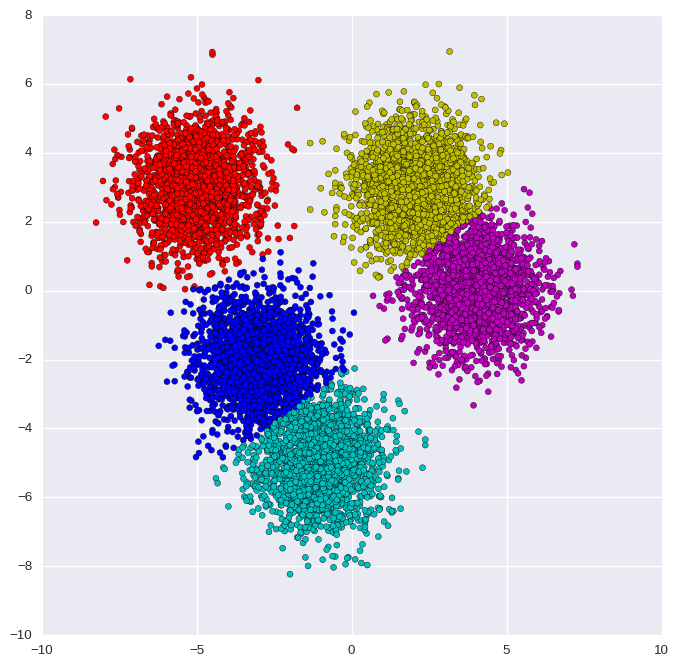

In [37]:
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=5)
__ = bench_cluster(kmeans, name="k-means++", data=X, labels=y)

# Extract cluster assignments for each data point.
labels = kmeans.labels_

# Count our clusters.
n_clusters_ = len(np.unique(labels))
label_color = [LABEL_COLOR_MAP[l] for l in labels]

print("Number of estimated clusters: {}".format(n_clusters_))
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
__ = plt.scatter(X[:, 0], X[:, 1], c=label_color)

### Mean-shift

_______________________________________________________________________________
init         time   homo   compl   v-meas   ARI   silhouette
mean-shift    0.29s  0.633  0.960   0.763   0.604   0.596
_______________________________________________________________________________
Number of estimated clusters: 3


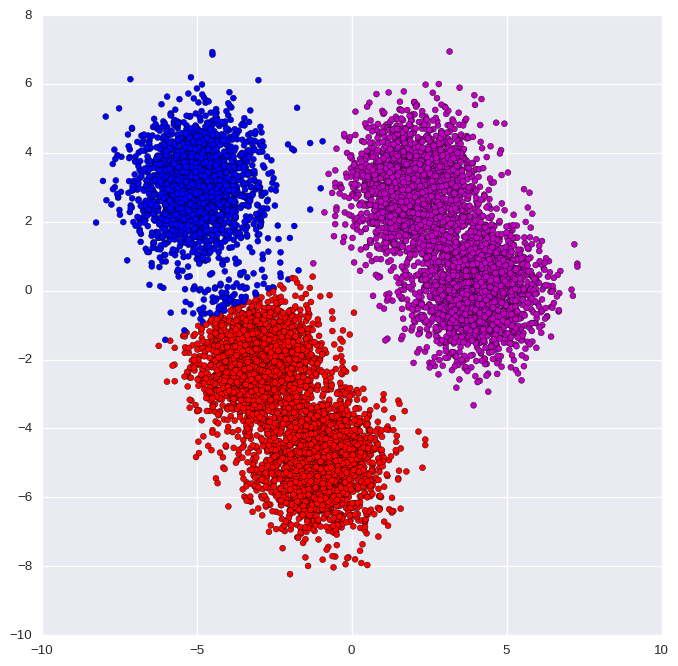

In [38]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X, quantile=0.2)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
__ = bench_cluster(ms, name="mean-shift", data=X, labels=y)

# Extract cluster assignments for each data point.
labels = ms.labels_
label_color = [LABEL_COLOR_MAP[l] for l in labels]

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
__ = plt.scatter(X[:, 0], X[:, 1], c=label_color)

### Spectral clustering

_______________________________________________________________________________
init         time   homo   compl   v-meas   ARI   silhouette
mean-shift   30.34s  0.912  0.912   0.912   0.922   0.569
_______________________________________________________________________________
Number of estimated clusters: 5


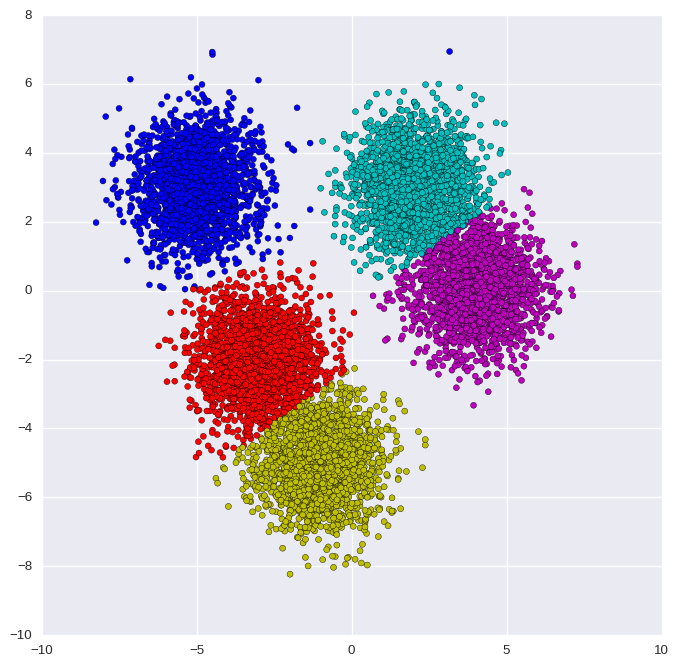

In [39]:
n_clusters=5

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
__ = bench_cluster(sc, name="mean-shift", data=X, labels=y)

# Extract cluster assignments for each data point.
labels = sc.labels_
label_color = [LABEL_COLOR_MAP[l] for l in labels]

# Predicted clusters.
predict = sc.fit_predict(X)

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

# Graph results.
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
__ = plt.scatter(X[:, 0], X[:, 1], c=label_color)

### Affinity propagation

In [29]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation()
__ = bench_cluster(af, name="Affinity", data=X, labels=y)

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: {}'.format(n_clusters_))

_______________________________________________________________________________
init         time   homo   compl   v-meas   ARI   silhouette
Affinity  358.00s  0.949  0.261   0.409   0.048   0.143
_______________________________________________________________________________
Estimated number of clusters: 1719


## 2 - Three Clusters Far Apart from each other :


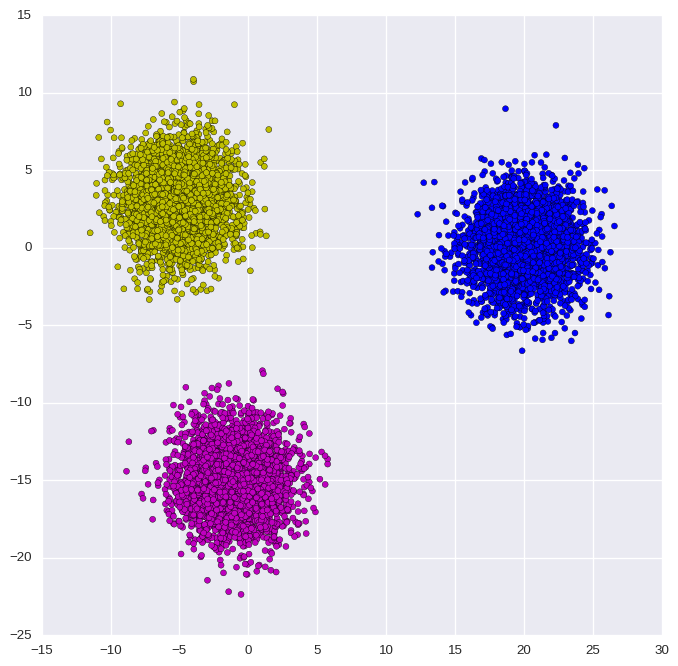

In [40]:
# The coordinates of the centers of our blobs.
centers = [[-5, 3], [-1, -15], [20, 0]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=2,
    n_features=8,
    random_state=42)

LABEL_COLOR_MAP = {0 : 'y', 1 : 'm', 2 : 'b'}

label_color = [LABEL_COLOR_MAP[l] for l in y]

plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
__ = plt.scatter(X[:, 0], X[:, 1], c=label_color)

### K-Means

_______________________________________________________________________________
init         time   homo   compl   v-meas   ARI   silhouette
k-means++    0.02s  1.000  1.000   1.000   1.000   0.827
_______________________________________________________________________________
Number of estimated clusters: 3


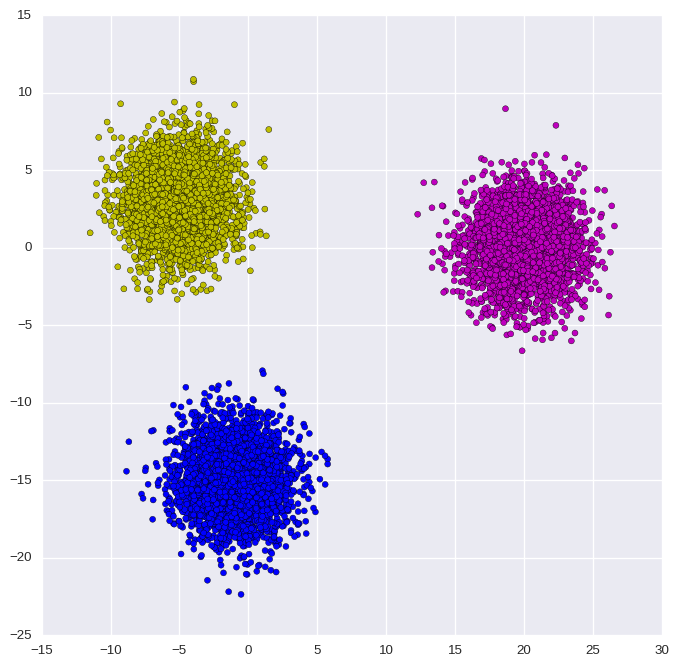

In [41]:
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=3)
__ = bench_cluster(kmeans, name="k-means++", data=X, labels=y)

# Extract cluster assignments for each data point.
labels = kmeans.labels_

label_color = [LABEL_COLOR_MAP[l] for l in labels]
# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
__ = plt.scatter(X[:, 0], X[:, 1], c=label_color)

### Mean-shift

_______________________________________________________________________________
init         time   homo   compl   v-meas   ARI   silhouette
mean-shift    0.22s  1.000  1.000   1.000   1.000   0.819
_______________________________________________________________________________
Number of estimated clusters: 3


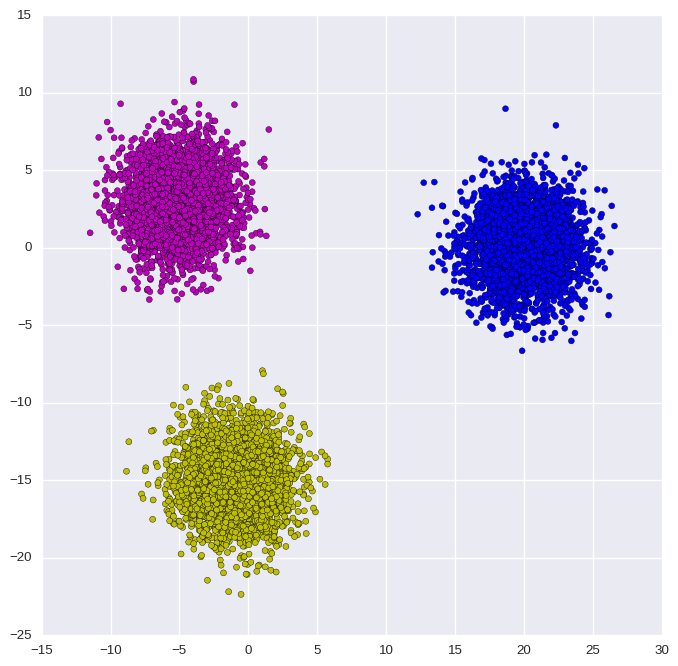

In [42]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X, quantile=0.2)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
__ = bench_cluster(ms, name="mean-shift", data=X, labels=y)

# Extract cluster assignments for each data point.
labels = ms.labels_
label_color = [LABEL_COLOR_MAP[l] for l in labels]

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
__ = plt.scatter(X[:, 0], X[:, 1], c=label_color)

### Spectral clustering

_______________________________________________________________________________
init         time   homo   compl   v-meas   ARI   silhouette
spectral   86.83s  0.820  0.825   0.823   0.838   0.689
_______________________________________________________________________________
Number of estimated clusters: 3


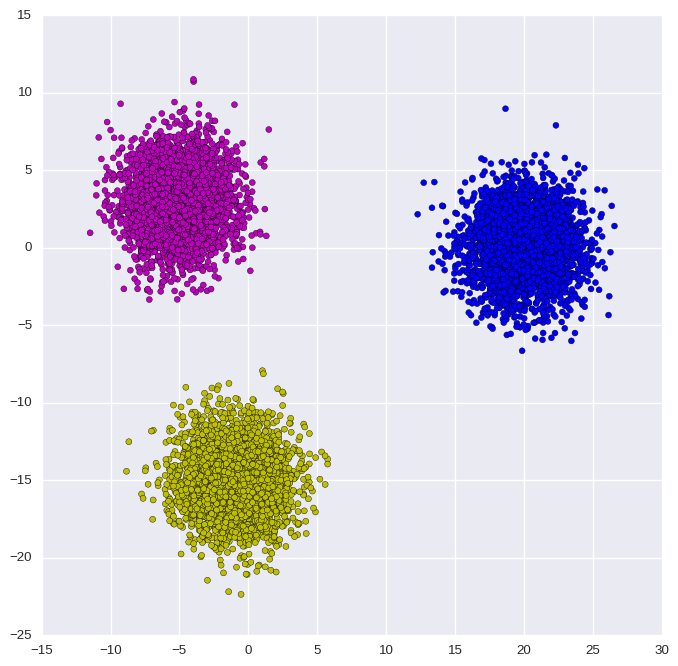

In [43]:
# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
__ = bench_cluster(sc, name="spectral", data=X, labels=y)

# Predicted clusters.
predict = sc.fit_predict(X)

# Count our clusters.
labels = ms.labels_
label_color = [LABEL_COLOR_MAP[l] for l in labels]
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

# Graph results.
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
__ = plt.scatter(X[:, 0], X[:, 1], c=label_color)

### Affinity propagation

In [35]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X)
__ = bench_cluster(af, name="Affinity", data=X, labels=y)

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_


print('Estimated number of clusters: {}'.format(n_clusters_))

_______________________________________________________________________________
init         time   homo   compl   v-meas   ARI   silhouette
Affinity  369.84s  1.000  0.159   0.274   0.024   0.061
_______________________________________________________________________________
Estimated number of clusters: 4522


## 3 - Two Circles near each other :

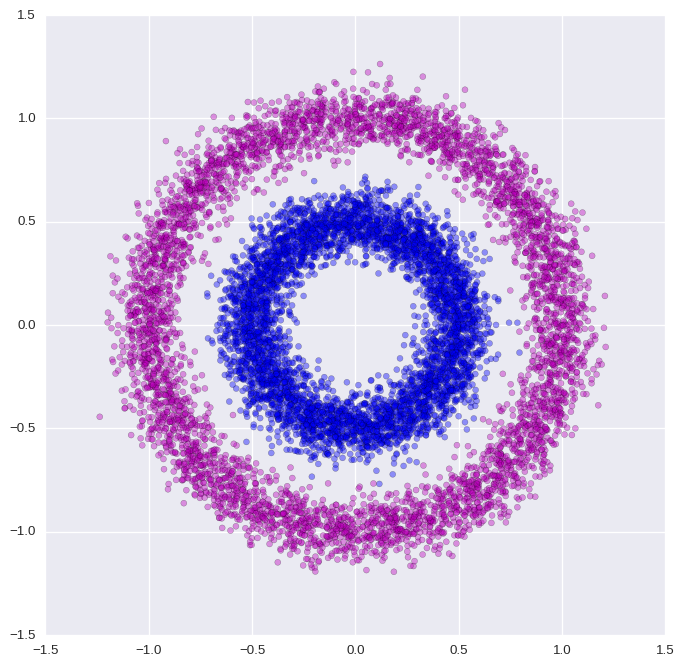

In [44]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=10000, factor=.5, noise=.08)

LABEL_COLOR_MAP = { 0 : 'm', 1 : 'b'}

label_color = [LABEL_COLOR_MAP[l] for l in y]

plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
__ = plt.scatter(X[:, 0], X[:, 1], c=label_color, alpha=0.4)

### K-Means

_______________________________________________________________________________
init         time   homo   compl   v-meas   ARI   silhouette
k-means++    0.04s  0.000  0.000   0.000  -0.000   0.355
_______________________________________________________________________________
Number of estimated clusters: 2


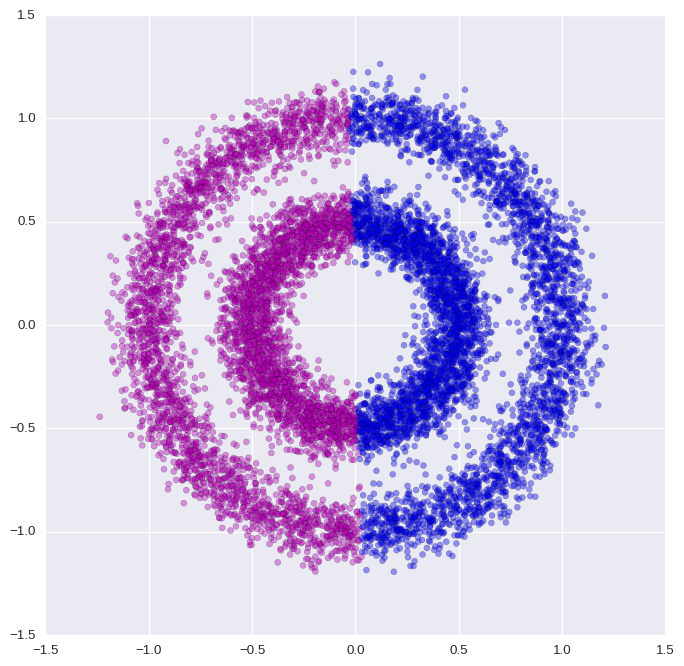

In [45]:
kmeans = KMeans(init='k-means++', n_clusters=2, n_init=2)
__ = bench_cluster(kmeans, name="k-means++", data=X, labels=y)

# Extract cluster assignments for each data point.
labels = kmeans.labels_
label_color = [LABEL_COLOR_MAP[l] for l in labels]

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
__ = plt.scatter(X[:, 0], X[:, 1], c=label_color, alpha=0.4)

### Mean-shift

_______________________________________________________________________________
init         time   homo   compl   v-meas   ARI   silhouette
Mean-shift    0.25s  0.007  0.008   0.008   0.010   0.321
_______________________________________________________________________________
Number of estimated clusters: 2


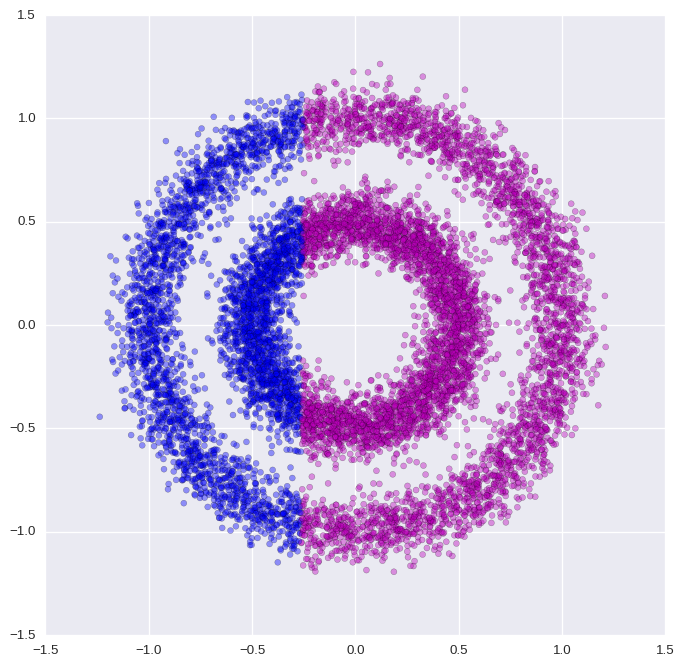

In [46]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X, quantile=0.2)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
__ = bench_cluster(ms, name="Mean-shift", data=X, labels=y)

# Extract cluster assignments for each data point.
labels = ms.labels_
label_color = [LABEL_COLOR_MAP[l] for l in labels]

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
__ = plt.scatter(X[:, 0], X[:, 1], c=label_color, alpha=0.4)

### Spectral clustering

_______________________________________________________________________________
init         time   homo   compl   v-meas   ARI   silhouette
spectral    6.56s  0.001  0.001   0.001   0.001   0.349
_______________________________________________________________________________
Number of estimated clusters: 2


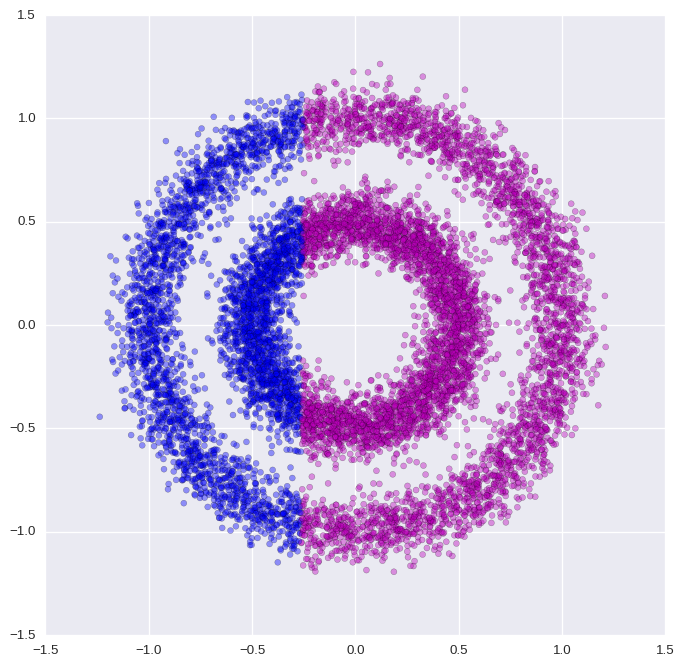

In [48]:
n_clusters=2

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors')
__ = bench_cluster(sc, name="spectral", data=X, labels=y)

# Count our clusters.
labels = ms.labels_
label_color = [LABEL_COLOR_MAP[l] for l in labels]
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

# Graph results.
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
__ = plt.scatter(X[:, 0], X[:, 1], c=label_color, alpha=0.4)

### Affinity propagation

In [49]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X)
__ = bench_cluster(af, name="Affinity", data=X, labels=y)

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

_______________________________________________________________________________
init         time   homo   compl   v-meas   ARI   silhouette
Affinity  364.82s  0.994  0.095   0.173   0.007   0.039
_______________________________________________________________________________
Estimated number of clusters: 4574


##  Discussion

In [51]:
# Create results table to make model comparisons easier 
# K-Means Table
table1_dict = {'Actual Clusters' : [5, 3, 2],
               'Estimated Clusters' : [5, 3, 2],
               'Silhouette Coefficient' : [0.560, 0.824, 0.345],
               'Adjusted Rand Index': [0.923, 1.0, 0.0],
               'Time' : ['0.07s', '0.02s', '0.04s']}

table_index = ['5 Close Clusters', '3 Cluster Far Apart', '2 Close Circle Clusters']
k_means_table_df = pd.DataFrame(table1_dict, index=table_index)

# Mean-Shift Table
table2_dict = {'Actual Clusters' : [5, 3, 2],
               'Estimated Clusters' : [3, 3, 4],
               'Silhouette Coefficient' : [0.610, 0.824, 0.372],
               'Adjusted Rand Index': [0.604, 1.0, 0.010],
               'Time' : ['0.29s', '0.22s', '0.25s']}

meanshift_table_df = pd.DataFrame(table2_dict, index=table_index)

# Spectral Clustering Table
table3_dict = {'Actual Clusters' : [5, 3, 2],
               'Estimated Clusters' : [5, 3, 2],
               'Silhouette Coefficient' : [0.560, 0.708, 0.350],
               'Adjusted Rand Index': [0.922, 0.838, 0.001],
               'Time' : ['30.34s', '86.83s', '6.56s']}

spectral_table_df = pd.DataFrame(table3_dict, index=table_index)

# Affinity Clustering Table
table4_dict = {'Actual Clusters' : [5, 3, 2],
               'Estimated Clusters' : [1719, 4522, 4574],
               'Silhouette Coefficient' : [0.131, 0.070, 0.097],
               'Adjusted Rand Index': [0.048, 0.024, 0.007],
               'Time' : ['358s', '367s', '364.8s']}

affinity_table_df = pd.DataFrame(table4_dict, index=table_index)

print('K-Means Results')
display(k_means_table_df)

print('\nMean-Shift Results')
display(meanshift_table_df)

print('\nSpectral Results')
display(spectral_table_df)

print('\nAffinity Results')
display(affinity_table_df)

K-Means Results


Actual Clusters  Adjusted Rand Index  \
5 Close Clusters                       5                0.923   
3 Cluster Far Apart                    3                1.000   
2 Close Circle Clusters                2                0.000   

                         Estimated Clusters  Silhouette Coefficient   Time  
5 Close Clusters                          5                   0.560  0.07s  
3 Cluster Far Apart                       3                   0.824  0.02s  
2 Close Circle Clusters                   2                   0.345  0.04s


Mean-Shift Results


Actual Clusters  Adjusted Rand Index  \
5 Close Clusters                       5                0.604   
3 Cluster Far Apart                    3                1.000   
2 Close Circle Clusters                2                0.010   

                         Estimated Clusters  Silhouette Coefficient   Time  
5 Close Clusters                          3                   0.610  0.29s  
3 Cluster Far Apart                       3                   0.824  0.22s  
2 Close Circle Clusters                   4                   0.372  0.25s


Spectral Results


Actual Clusters  Adjusted Rand Index  \
5 Close Clusters                       5                0.922   
3 Cluster Far Apart                    3                0.838   
2 Close Circle Clusters                2                0.001   

                         Estimated Clusters  Silhouette Coefficient    Time  
5 Close Clusters                          5                   0.560  30.34s  
3 Cluster Far Apart                       3                   0.708  86.83s  
2 Close Circle Clusters                   2                   0.350   6.56s


Affinity Results


Actual Clusters  Adjusted Rand Index  \
5 Close Clusters                       5                0.048   
3 Cluster Far Apart                    3                0.024   
2 Close Circle Clusters                2                0.007   

                         Estimated Clusters  Silhouette Coefficient    Time  
5 Close Clusters                       1719                   0.131    358s  
3 Cluster Far Apart                    4522                   0.070    367s  
2 Close Circle Clusters                4574                   0.097  364.8s

Affinity propagation had the lowest Silhouette coefficient scores and took the longest to run.  In addition, it always greatly over estimated the number of clusters.   The Spectral Clustering algorithm performed slightly better.  Its job on the two ring clusters is mis leading. Its labeling of the clusters cut both groups in half and not along the contours of the cluster boundaries.  

The Mean-Shift algorithm performed better than the Spectral and Affinity algorithms especially considering that it no prior knowledge to the number of clusters in the dataset.   It had higher coefficient values than the K-Means algorithm. Interestingly it had a slightly higher Silhouette coefficient value than K-Means for the donut clusters considering than it over estimated the number of clusters. It would appear that he Mean-Shift algorithm is a better jack of trades algorithm because it needs no knowledge of the number of clusters in the data to run.